In [1]:
import siesta_utils.grid as siesta 
from siesta_utils.conversions import AtoBohr
import elf 
from ase.io import read, write
import numpy as np 
import xcml

In [2]:
data = siesta.get_data('0.RHOXC')

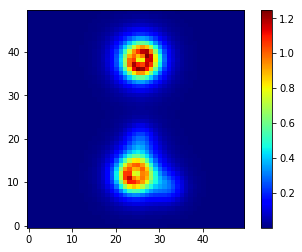

In [3]:
siesta.glimpse(rmax = [25,25,25])

In [4]:
atoms = read('./dimer.traj')

In [5]:
basis = {'r_c_o': 1.0,'r_i_o': 0.05, 'r_i_h': 0.0, 'r_c_h' : 1.5,
                      'n_rad_o' : 2,'n_rad_h' : 2, 'n_l_o' : 3,
                      'n_l_h' : 2, 'gamma_o': 0, 'gamma_h': 0}

In [11]:
import pickle

In [12]:
coeff = xcml.atom_decomposition(atoms.get_positions()[:3], siesta, basis, atom_label='o')

In [13]:
elf.geom.make_real_old(coeff)

array([ 2.27662678e+02,  1.31158872e+01,  7.53970321e+00,  6.77460109e-16,
        1.55651509e+00,  1.68498769e+00, -2.11963114e-16, -1.68298712e-15,
       -5.00391818e+00,  1.06986938e+02, -8.77834036e+00, -4.65574596e+00,
       -7.31417109e-16, -1.12244646e+00, -3.80287314e+00,  5.39446125e-16,
        2.61562482e-15,  9.25068885e+00])

In [14]:
for key in coeff:
    coeff[key] = np.complex64(coeff[key])

In [15]:
isinstance(coeff['0,0,0'], np.complex)

False

In [16]:
pickle.dump(coeff, open('descr_global.dat', 'wb'))

In [7]:
AtoBohr

1.889725989

In [29]:
xcml.in_local_cs?

In [8]:
1/AtoBohr

0.5291772488820865

In [9]:
r_grid = np.arange(0,1.5,0.1)

In [10]:
np.sum(elf.real_space.g(r_grid, 0, 1.5, 0,0)**2)*0.001

0.01000001747636031

In [11]:
scaling = 6.5
np.sum(elf.real_space.g(r_grid*scaling, 0*scaling, 1.5*scaling, 0,0)**2)*0.001*scaling

0.010000017476360309

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


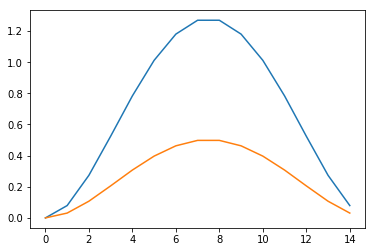

In [13]:
plot(elf.real_space.g(r_grid, 0, 1.5, 0,0))
plot(elf.real_space.g(r_grid*scaling, 0*scaling, 1.5*scaling, 0,0))

In [14]:
np.sqrt(1/AtoBohr)

0.7274457016726997

In [15]:
9.39**2+11.85**2

228.5946

In [16]:
atoms

Atoms(symbols='OH2OH2', pbc=False)

In [18]:
elf.geom.get_nncs_angles(0,atoms.get_positions())

(3.141592653589793, 0.0, 2.7622961546661093)

In [24]:
coords = atoms.get_positions()[[1,2]]
order = np.argsort(np.linalg.norm(coords - atoms.get_positions()[0], axis = 1))
coords = coords[order]

In [25]:
xcml.angle_molecular(None, atoms.get_positions()[0], coords)

(3.141592653589793, 0.0, 2.7622961546661093)

In [26]:
xcml.rotate_vector_real?

In [28]:
258**2+5.7**2

66596.49

In [30]:
237.87**2 + 100.98**2

66779.09730000001

In [31]:
xcml.atom_decomposition(atoms.get_positions()[:3], siesta, basis, atom_label='o')

array([ 2.27662678e+02, -1.58835914e-01, -1.51277358e+01,  6.77460109e-16,
       -2.22844859e+00,  5.44003341e-01, -1.34263772e-15,  1.03667640e-15,
       -5.00391818e+00,  1.06986938e+02,  4.42799713e-01,  9.92668920e+00,
       -7.31417109e-16,  3.87006371e+00,  8.62749704e-01,  1.98009287e-15,
       -1.79212934e-15,  9.25068885e+00])